In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow

tensorflow.__version__

'2.6.0'

In [4]:
# 1. CIFAR100 Data_Set Load

from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169017344/169001437 [==============================] - 2s 0us/step


In [6]:
# 2. Data Preprocessing

# reshape and normalization

X_train = X_train.reshape((50000, 32, 32, 3))
X_test = X_test.reshape(10000, 32, 32, 3)

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# 3. MNIST Keras Modeling

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)              

In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [14]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 50,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/50
313/313 [==============================] - 40s 26ms/step - loss: 4.2061 - accuracy: 0.0584 - val_loss: 3.7057 - val_accuracy: 0.1482
Epoch 2/50
313/313 [==============================] - 7s 23ms/step - loss: 3.5954 - accuracy: 0.1519 - val_loss: 3.2734 - val_accuracy: 0.2075
Epoch 3/50
313/313 [==============================] - 7s 23ms/step - loss: 3.2692 - accuracy: 0.2086 - val_loss: 3.0309 - val_accuracy: 0.2683
Epoch 4/50
313/313 [==============================] - 7s 23ms/step - loss: 3.0472 - accuracy: 0.2503 - val_loss: 2.8514 - val_accuracy: 0.2982
Epoch 5/50
313/313 [==============================] - 7s 23ms/step - loss: 2.8768 - accuracy: 0.2813 - val_loss: 2.7656 - val_accuracy: 0.3124
Epoch 6/50
313/313 [==============================] - 7s 23ms/step - loss: 2.7246 - accuracy: 0.3111 - val_loss: 2.7035 - val_accuracy: 0.3302
Epoch 7/50
313/313 [==============================] - 7s 23ms/step - loss: 2.6105 - accuracy: 0.3333 - val_loss: 2.6038 - val_accuracy: 0.341

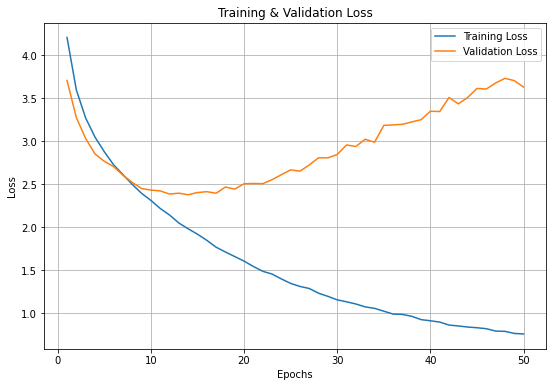

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 3.6567 - accuracy: 0.3782
Loss = 3.65671
Accuracy = 0.37820
